In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:\\Windows\\Fonts\\malgun.ttf').get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv('./data/data_airquality.csv')

In [4]:
df.shape

(576, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pm25       576 non-null    float64
 1   region     576 non-null    object 
 2   longitude  576 non-null    float64
 3   latitude   576 non-null    float64
dtypes: float64(3), object(1)
memory usage: 18.1+ KB


In [6]:
df.head()  # 미세먼지 농도 정보

,pm25,region,longitude,latitude
0,9.771185,east,-87.748260,30.592781
1,9.993817,east,-85.842858,33.265810
2,10.688618,east,-87.725960,34.731480
3,11.337424,east,-85.798919,34.459133
4,12.119764,east,-86.032125,34.018597


In [7]:
df.tail()

,pm25,region,longitude,latitude
571,4.955570,west,-108.999016,44.568961
572,6.549239,west,-106.968130,44.783629
573,5.632587,west,-109.991147,42.750949
574,6.349710,west,-109.168198,41.640708
575,4.565808,west,-110.673534,43.612124


In [8]:
np.round(df.describe(), 2)  # count로 결측치가 있는지 간단히 알 수 있다.

,pm25,longitude,latitude
count,576.00,576.00,576.00
mean,9.84,-91.65,38.56
std,2.28,15.76,5.12
min,3.38,-158.04,19.68
25%,8.55,-97.38,35.30
50%,10.05,-87.37,39.09
75%,11.36,-80.72,41.75
max,18.44,-68.26,64.82


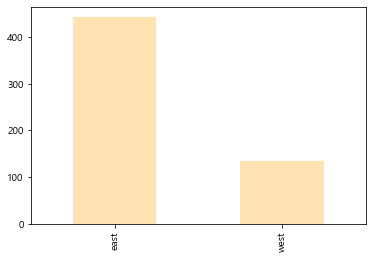

In [13]:
df.region.value_counts().plot.bar(color='orange', alpha=0.3)
plt.show()  # 측정치가 ease에 더 많다.

In [14]:
df2 = df[df.region=='east']
df2.shape

(442, 4)

In [15]:
df3 = df[df.region=='west']
df3.shape

(134, 4)

In [16]:
df4 = pd.DataFrame( {'Counts':[df2.shape[0], df3.shape[0]] }, index=['East', 'West'])
df4

,Counts
East,442
West,134


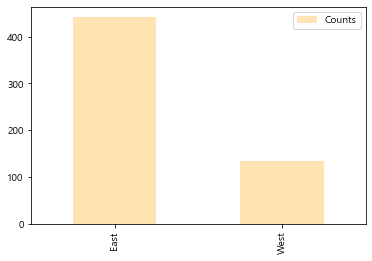

In [17]:
df4.plot.bar(color='orange', alpha=0.3)
plt.show()

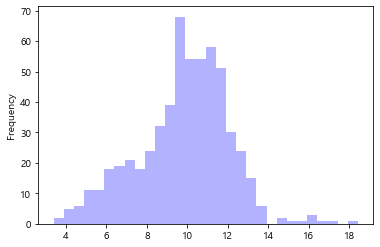

In [22]:
df['pm25'].plot.hist(bins=30, color='blue', alpha=0.3)
plt.show()

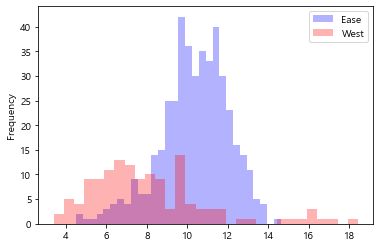

In [25]:
df2['pm25'].plot.hist(bins=30, color='blue', alpha=0.3, label='Ease')
df3['pm25'].plot.hist(bins=30, color='red', alpha=0.3, label='West')
plt.legend()  #  범례
plt.show()

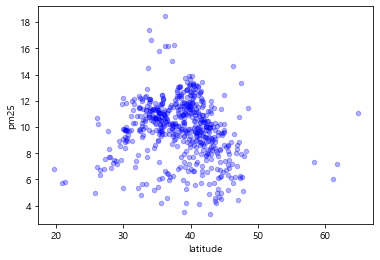

In [28]:
df.plot.scatter(x='latitude', y='pm25', color='blue', alpha=0.3, marker='o', s=20)  
# 위도(latitude) 가 높다고 해서 미세먼지 농도에 어떤 패턴은 보이지 않는다
plt.show()

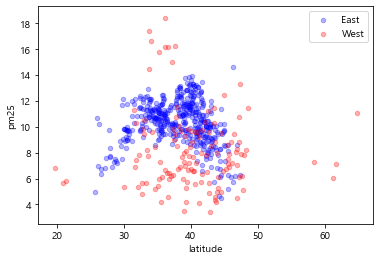

In [31]:
base = df2.plot.scatter(x='latitude', y='pm25', color='blue', alpha=0.3, marker='o', s=20, label='East')
df3.plot.scatter(x='latitude', y='pm25', color='red', alpha=0.3, marker='o', s=20, label='West', ax=base)  
# hist과 다르게 ax 인자값을 넣어야 그래프가 합쳐진다. 그리고 legend를 쓰지 않아도 범례가 생겨있다.
plt.show()  

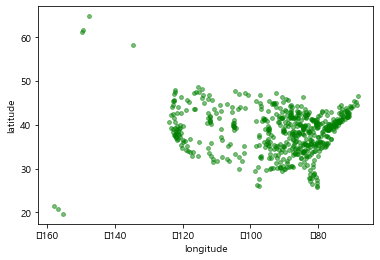

In [32]:
df.plot.scatter(x='longitude', y='latitude', color='green', alpha=0.5, marker='o', s=15)
plt.show()

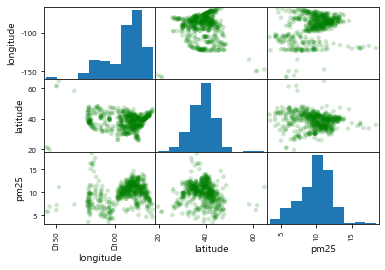

In [40]:
pd.plotting.scatter_matrix(df[ ['longitude', 'latitude', 'pm25'] ], color='green', marker='o', s=20, alpha=0.2)
# 첫번째 인자값으로 df만 넣어줘도 위와 같은 결과를 얻을 수 있고
# df.drop(columns ='longitude')해서 특정 컬럼을 지운 매트릭스를 볼 수도 있다.
plt.show()